In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,12)})
import warnings
warnings.filterwarnings("ignore")

C:\Users\Prakhar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic = pd.read_csv('train.csv',index_col=0)
data = titanic.copy()

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
col = ['Age','Cabin']
data = data.drop(columns = col,axis=1)

In [7]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [8]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
qual = data.select_dtypes(include = ['object']).columns

In [11]:
quan = set(data.columns)-set(qual)

In [12]:
qual

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [13]:
data[qual].describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Fox, Mr. Stanley Hubert",male,CA. 2343,S
freq,1,577,7,646


In [14]:
data['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
           ..
370371      1
11752       1
A/S 2816    1
28220       1
349256      1
Name: Ticket, Length: 681, dtype: int64

In [15]:
data[quan].describe()

,Pclass,SibSp,Fare,Parch,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,32.204208,0.381594,0.383838
std,0.836071,1.102743,49.693429,0.806057,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.910400,0.000000,0.000000
50%,3.000000,0.000000,14.454200,0.000000,0.000000
75%,3.000000,1.000000,31.000000,0.000000,1.000000
max,3.000000,8.000000,512.329200,6.000000,1.000000


In [16]:
data2 = data.drop(columns=['Name','Ticket'],axis=1)

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.7+ KB


In [18]:
data2.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [20]:
data2=pd.get_dummies(data2,drop_first=False)

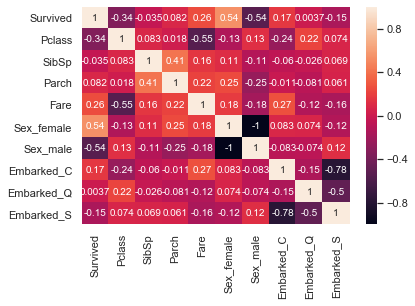

In [21]:
sns.heatmap(data2.corr(),annot=True)

In [22]:
col= set(data2.columns) - set(['Survived'])
col

{'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex_female',
 'Sex_male',
 'SibSp'}

In [23]:
X = data2[list(col)]
y = data2['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=22)

In [25]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [26]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
prediction = logistic.predict(X_test)

Text(0.5, 1, 'Confusion matrix for Logistic Regression')

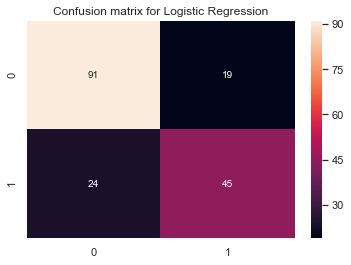

In [27]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm,annot=True)
plt.title('Confusion matrix for Logistic Regression')

In [28]:
cr = classification_report(y_test, prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       110
           1       0.70      0.65      0.68        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [29]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction2 = forest.predict(X_test)

Text(0.5, 1, 'Confusion matrix for Random Forest')

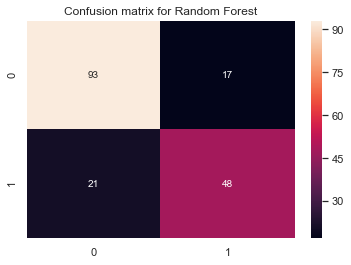

In [30]:
cm2 = confusion_matrix(y_test, prediction2)
sns.heatmap(cm2,annot=True)
plt.title('Confusion matrix for Random Forest')

In [31]:
cr2 = classification_report(y_test, prediction2)
print(cr2)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction3 = knn.predict(X_test)

Text(0.5, 1, 'Confusion matrix for KNN')

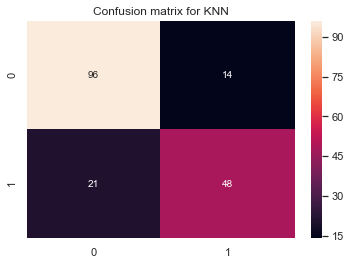

In [33]:
cm3 = confusion_matrix(y_test, prediction3)
sns.heatmap(cm3,annot=True)
plt.title('Confusion matrix for KNN')

In [34]:
cr3 = classification_report(y_test, prediction3)
print(cr3)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
decision_tree_model = DecisionTreeClassifier()

In [37]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
prediction4 = decision_tree_model.predict(X_test)

In [39]:
cr4 = classification_report(y_test, prediction4)
print(cr4)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.78      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [40]:
from sklearn import tree

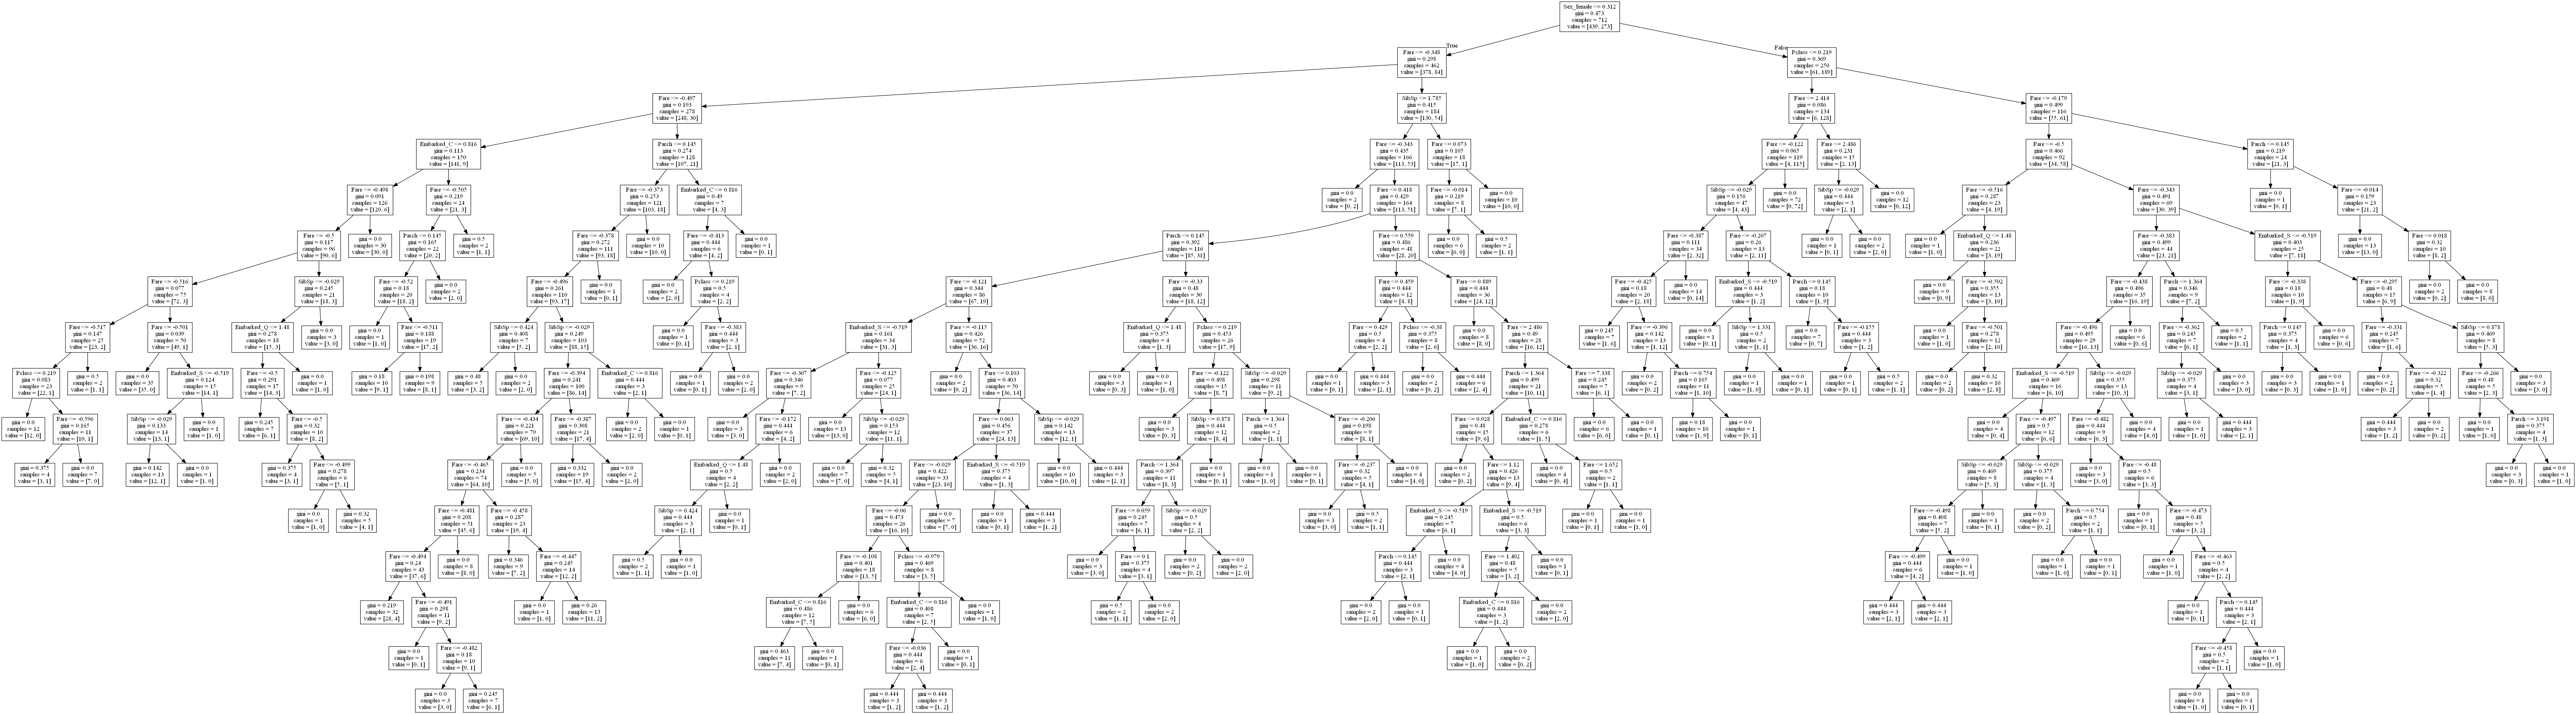

In [41]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(decision_tree_model, out_file=dot_data,feature_names=list(col))  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("Titanic.png")
Image(graph.create_png())  